In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [24]:
concrete = pd.read_csv("data/Concrete_Data.csv")
# Rename the columns
concrete.columns = ["cement", "slag", "ash", "water", "splast", "coarse", "fine", "age", "strength"]

In [25]:
concrete.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [26]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [27]:
number_of_samples, number_of_features  = concrete.shape

In [28]:
#Initializing X and Y according to shape and converting to numpy arrays
X = concrete.iloc[:,0:number_of_features-1].values
y = concrete.iloc[:,number_of_features-1:number_of_features].values

#Initializing theta
theta = np.zeros((number_of_features,1))

In [29]:
def feature_normalization(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_normalized : array_like
        The normalized dataset of shape (m x n).
    mean: array_like
        Mean of every column
    standard_deviation : array_like
        Standard Deviation of every column
    """
    standard_deviation = np.std(X, axis= 0)
    mean = np.mean(X, axis= 0)
    X_normalized = (X - mean)/ standard_deviation
    
    return X_normalized, mean, standard_deviation

In [30]:
normalized_X, mean_X, standard_deviation_X = feature_normalization(X)

In [31]:
#Adding the columns of 1s to X 
X = np.concatenate((np.ones((number_of_samples,1)),normalized_X), axis = 1)

In [32]:
def cost_function(X,y,theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    """
    #Initialisation of useful values 
    m = np.size(y)
    J = 0
    
    #Hypothesis function in vectorized form
    h = np.dot(X,theta)

    #Cost function in vectorized form
    J = float((1./(2*m)) * np.dot((h - y).T, (h - y)));    
    return J

In [33]:
def gradient_descent(X, y, theta, learning_rate = 0.0005, iteration=1000):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    learning_rate : float
        The learning rate for gradient descent. 
    
    iteration : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
        
    theta_history : list
        A python list for the values of theta per each iteration and store them in a list
    
    """
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(iteration)

    for i in range(iteration):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Calculating the grad function in vectorized form
        theta = theta - learning_rate * (1/m)* (X.T.dot(h-y))
        J_history[i] = cost_function(X,y,theta)
    optimized_hypothesis= h
    return theta, J_history, optimized_hypothesis

In [34]:
# initialize parameter - theta is defined before
learning_rate= .02
iteration= 1000
# run gradient descent
theta_optimized , cost_function_history, optimized_hypothesis= gradient_descent(X, y, theta, learning_rate, iteration)

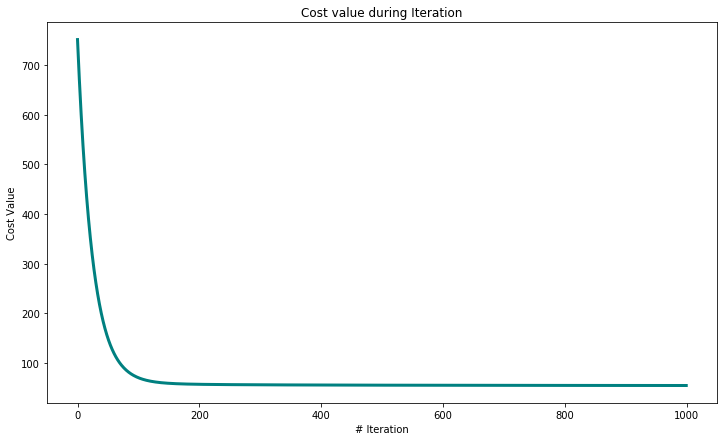

In [35]:
plt.figure(figsize= (12,7))
plt.plot(range(1000), cost_function_history, color= "teal", linewidth= 3)
plt.xlabel("# Iteration")
plt.ylabel("Cost Value")
plt.title("Cost value during Iteration")
plt.show()

In [36]:
def r_squared(predicted_hypothesis, actual_y):
    
    sum_of_squared_residuals= np.sum(np.square(actual_y - predicted_hypothesis))
    sum_of_squared_total= np.sum(np.square(actual_y - np.mean(actual_y)))
    r_squared= 1 - ((float(sum_of_squared_residuals))/sum_of_squared_total)
    return r_squared

In [37]:
r_squared= r_squared(optimized_hypothesis, y)

In [38]:
def adjusted_r_squared(r_squared, actual_y):
    
    # initialize values
    number_of_samples, number_of_features= X.shape
    # number of features have surplus value because of intercept values that we added a vector for another features
    number_of_features -= 1
    # adjusted R squared formula
    adjusted_r_squared= 1 - (1 - r_squared) * (number_of_samples - 1)/(number_of_samples - number_of_features - 1)
    return adjusted_r_squared

In [39]:
adjusted_r_squared(r_squared, y)

0.607943011566304

In [40]:
r_squared

0.6109910736726885